# 9. Sortiranje, filtriranje i frekvencijska analiza

U ovoj lekciji ćemo govoriti o:
1. preuređivanju redova tabele kako bi se poređali po veličini po nekom kriterijumu (_sortiranje_);
2. izdvajanju redova tabele koji zadovoljavaju neke uslove (_filtriranje_); i
3. brojanju redova tabele koji imaju neke osobine (_frekvencijska analiza_).

## 9.1. Sortiranje podataka

_Sortirati podatke_ znači poređati ih po veličini. Da bismo videli kako se to radi u biblioteci _pandas_ prvo ćemo učitati biblioteku:

In [1]:
import pandas as pd

a onda ćemo napraviti tabelu sa podacima o grupi dece koju smo već koristili, kolonama ćemo dati odgovarajuća imena i indeksiraćemo tabelu imenima dece:

In [2]:
podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159],
          ["Elena",   "ž", 14, 49, 161],
          ["Žaklina", "ž", 15, 52, 164],
          ["Zoran",   "m", 15, 57, 167],
          ["Ivana",   "ž", 13, 45, 158],
          ["Jasna",   "ž", 14, 51, 162]]
tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]
tabela1 = tabela.set_index("Ime")

Evo kako tabela izgleda:

In [3]:
tabela1

,Pol,Starost,Masa,Visina
Ime,,,,
Ana,ž,13,46,160
Bojan,m,14,52,165
Vlada,m,13,47,157
Gordana,ž,15,54,165
Dejan,m,15,56,163
Đorđe,m,13,45,159
Elena,ž,14,49,161
Žaklina,ž,15,52,164
Zoran,m,15,57,167


Hajde sada da sortiramo tabelu po visini upotrebom funkcije `sort_values` (engl. _sort_ znači "sortiraj, poređaj po veličini", dok _values_ znači "vrednosti").

Ovoj funkciji moramo da kažemo po kom kriterijumu se sortiraju podaci (po visini, težini, starosti, ...) tako što ime odgovarajuće kolone navedemo kao vrednost argumenta `by` (engl. reč "by" znači svašta, ali u ovom kontekstu znači "prema").

Funkcija ne menja polaznu tabelu, već od nje pravi novu:

In [4]:
tabela1_po_visini = tabela1.sort_values(by="Visina")
tabela1_po_visini

,Pol,Starost,Masa,Visina
Ime,,,,
Vlada,m,13,47,157
Ivana,ž,13,45,158
Đorđe,m,13,45,159
Ana,ž,13,46,160
Elena,ž,14,49,161
Jasna,ž,14,51,162
Dejan,m,15,56,163
Žaklina,ž,15,52,164
Bojan,m,14,52,165


Pošto nismo naveli kako želimo da sortiramo podatke (od najmanjeg ka najvećem, ili obrnuto) podaci su sortirani od najmanjeg ka najvećem. Ukoliko želimo da sortiramo tabelu po visini, ali od najveće ka najmanjoj, potrebno je to naglasiti koristeći parametar `ascending=False` (engl. _ascending_ znači "rastuće").

In [5]:
tabela1_po_visini = tabela1.sort_values(by="Visina", ascending=False)
tabela1_po_visini

,Pol,Starost,Masa,Visina
Ime,,,,
Zoran,m,15,57,167
Bojan,m,14,52,165
Gordana,ž,15,54,165
Žaklina,ž,15,52,164
Dejan,m,15,56,163
Jasna,ž,14,51,162
Elena,ž,14,49,161
Ana,ž,13,46,160
Đorđe,m,13,45,159


Hajde, za kraj, da prikažemo podatke iz ovako sortirane tabele.

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(tabela1_po_visini.index, tabela1_po_visini["Visina"], label="Visina")
plt.bar(tabela1_po_visini.index, tabela1_po_visini["Masa"], label="Masa")
plt.title("Visina i masa dece u grupi")
plt.legend()
plt.show()
plt.close()

<Figure size 1000x500 with 1 Axes>

## 9.2. Filtriranje podataka

Često je iz tabele potrebno izdvojiti redove koji imaju neke osobine. Na primer, ako želimo da izdvojimo samo one redove tabele u kojima su navedeni podaci o devojčicama, to možemo uraditi na sledeći način:

    tabela1[tabela1.Pol == "ž"]

Ovaj izraz će iz tabele `tabela1` izdvojiti sve redove kod kojih u koloni "Pol" piše "ž". (Obratite pažnju na to da se prilikom formiranja kriterijuma u izrazu `tabela1.Pol` ne pišu navodnici! Ne pitajte zašto...)

In [7]:
devojke = tabela1[tabela1.Pol == "ž"]
devojke

,Pol,Starost,Masa,Visina
Ime,,,,
Ana,ž,13,46,160
Gordana,ž,15,54,165
Elena,ž,14,49,161
Žaklina,ž,15,52,164
Ivana,ž,13,45,158
Jasna,ž,14,51,162


Na sličan način možemo da izdvojimo svu decu koja imaju preko 50 kg:

In [8]:
preko_50kg = tabela1[tabela1.Masa > 50]
preko_50kg

,Pol,Starost,Masa,Visina
Ime,,,,
Bojan,m,14,52,165
Gordana,ž,15,54,165
Dejan,m,15,56,163
Žaklina,ž,15,52,164
Zoran,m,15,57,167
Jasna,ž,14,51,162


Kriterijume možemo i da kombinujemo. Na primer, ako želimo da iz tabele izvučemo podatke o svim dečacima sa najviše 55 kg treba iz tabele da izdvojimo podatke koji zadovoljavaju dva kriterijuma:

    Masa <= 55  i  Pol == "m".

Logički veznik "i" se u biblioteci `pandas` označava simbolom `&`. Prema tome, podatke dobijamo tako što tabeli prosledimo sledeći zahtev za filtriranje:

In [9]:
decaci_do_55kg = tabela1[(tabela1.Masa <= 55) & (tabela1.Pol == "m")]
decaci_do_55kg

,Pol,Starost,Masa,Visina
Ime,,,,
Bojan,m,14,52,165
Vlada,m,13,47,157
Đorđe,m,13,45,159


Prikazaćemo, za kraj, podatke o masi i visini ovih dečaka jednim grafikonom:

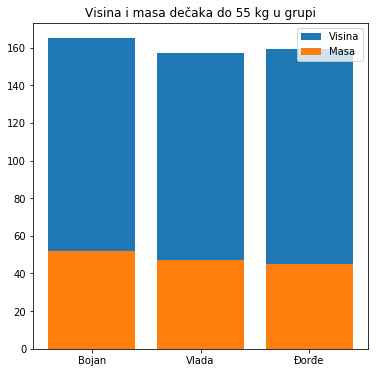

In [10]:
plt.figure(figsize=(6,6))
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Visina"], label="Visina")
plt.bar(decaci_do_55kg.index, decaci_do_55kg["Masa"], label="Masa")
plt.title("Visina i masa dečaka do 55 kg u grupi")
plt.legend()
plt.show()
plt.close()

## 9.3. Frekvencijska analiza


Da se podsetimo, frekvencijska analiza niza podataka se svodi na to da se prebroji koliko se puta koji podatak pojavljuje u nizu.  Dok smo ranije morali dosta toga sami da uradimo, biblioteka `pandas` ima funkciju `value_counts` koja vrši frekvencijsku analizu (engl. _value_ znači "vrednost", dok _count_ znači "brojati"; dakle, prebrojati vrednosti).

Evo primera. Ako u tabeli sa kojom radimo želimo da prebrojimo dečake i devojčice, to možemo učiniti pozivom funkcije `value_counts` ovako:

In [11]:
tabela1["Pol"].value_counts()

ž    6
m    5
Name: Pol, dtype: int64

Funkcija `value_counts` je u koloni "Pol" prebrojala sve vrednosti i utvrdila da se u toj koloni vrednost "ž" pojavljuje 6 puta, dok se vrednost "m" pojavljuje 5 puta.

Ako želimo da utvrdimo starosnu strukturu grupe, primenićemo funkciju `value_counts` na kolonu "Starost":

In [12]:
tabela1["Starost"].value_counts()

15    4
13    4
14    3
Name: Starost, dtype: int64

Funkcija `value_counts` je u koloni "Starost" prebrojala sve vrednosti i utvrdila da se u toj koloni vrednosti 15 i 13 pojavljuju po 4 puta, dok se vrednost 14 pojavljuje 3 puta.

Ako rezultat rada funkcije `value_counts` smestimo u promenljivu:

In [13]:
frekv = tabela1["Pol"].value_counts()
frekv

ž    6
m    5
Name: Pol, dtype: int64

onda možemo lako da rekonstruišemo koje su vrednosti uočene u tabeli, i koje su njihove frekvencije. Naime,

    frekv.index
    
nam daje listu uočenih vrednosti, dok
    
    frekv.values

daje njihove frekvencije.

In [14]:
print("Vrednosti koje se javljaju u koloni:", frekv.index)
print("Njihove frekvencije:", frekv.values)

Vrednosti koje se javljaju u koloni: Index(['ž', 'm'], dtype='object')
Njihove frekvencije: [6 5]


Polnu strukturu ove grupe dece možemo da prikažemo sektorskim dijagramom ovako:

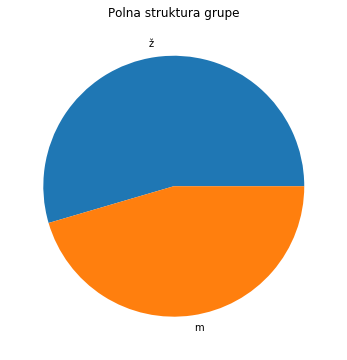

In [15]:
import matplotlib.pyplot as plt
frekv = tabela1["Pol"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Polna struktura grupe")
plt.show()
plt.close()

Na sličan način možemo da prikažemo starosnu strukturu grupe:

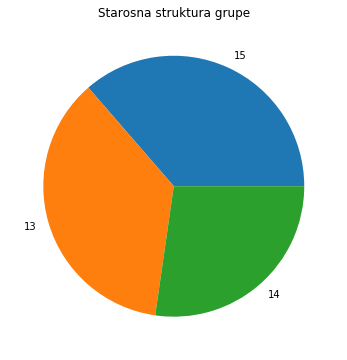

In [16]:
frekv = tabela1["Starost"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(frekv.values, labels=frekv.index)
plt.title("Starosna struktura grupe")
plt.show()
plt.close()

Na adresi

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
se nalazi javno dostupan spisak svih država na svetu. Ovu tabelu možemo lako učitati naredbom `read_csv`:

In [17]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.head(5)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Broj država po kontinentima možemo videti ovako:

In [18]:
drzave["Region"].value_counts()

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

Prikažimo broj država po kontinentima sektorskim dijagramom:

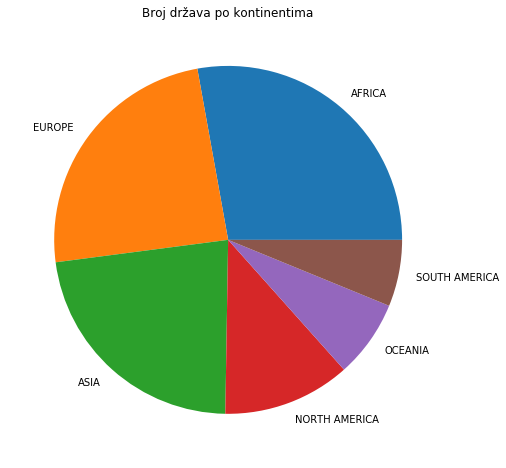

In [19]:
import matplotlib.pyplot as plt
po_kontinentima = drzave["Region"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(po_kontinentima.values, labels=po_kontinentima.index)
plt.title("Broj država po kontinentima")
plt.show()
plt.close()

## 9.4. Zadaci

Zadatke reši u Džupajteru.

**Zadatak 1.** Pogledaj program i dijagram, pa odgovori na sledeća pitanja:

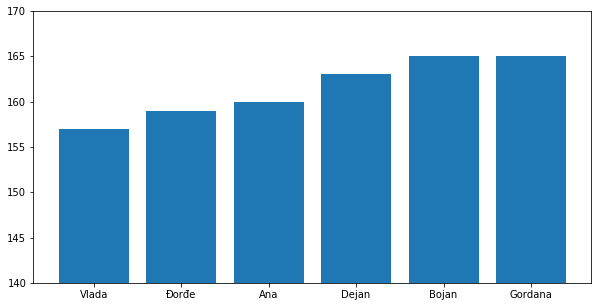

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159]]

tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]
tabela1=tabela.set_index("Ime")

tabela_po_visini = tabela1.sort_values(by="Visina")

plt.figure(figsize=(10,5))
plt.bar(tabela_po_visini.index, tabela_po_visini["Visina"])
plt.ylim(140,170)
plt.show()
plt.close()

1. Zašto stubići na dijagramu rastu kada to nije slučaj sa podacima u listi `podaci`?
2. Šta treba izmeniti u programu da bismo dobili grafikon koji opada?

**Zadatak 2.** U datoteci _podaci/RekeSrbije.csv_ navedene su najduže reke Srbije, njihova ukupna dužina u km, i dužina toka kroz Srbiju u km.

_(a)_ Učitaj podatke u tabelu (tabela ima zaglavlje), i prikaži prvih nekoliko redova tabele.

 
_(b)_ Sortiraj tabelu po dužini toka reke kroz Srbiju.

_(v)_ Za navedene reke prikaži linijskim dijagramom ukupnu dužinu, i dužinu toka reke kroz Srbiju.

_(g)_ Od date tabele napravi novu u kojoj su izdvojene samo one reke koje bar polovinu svog toka protiču kroz Srbiju, pa tako dobijenu tabelu upiši u datoteku _podaci/Reke2.csv_ vodeći računa o tome da su neki podaci u tabeli zapisani ćirilicom.

**Zadatak 3.** Nutritivni podaci za neke ribe i morske plodove su dati u sledećoj tabeli:

| Namirnica (100g) | Energetska vrednost (kcal) | Ugljeni hidrati (g) | Belančevine (g) | Masti (g) |
|--|--|--|--|--|
|Tuna|116|0|26|1|
|Oslić|88|0|17.2|0.8|
|Pastrmka|119|0|18|5|
|Losos|116|0|20|3.5|
|Skuša|205|0|19|14|
|Sardine|135|0|18|5|
|Haringa|158|0|18|9|
|Bakalar|82|0|18|0.7|
|Som|95|0|16.4|2.8|
|Šaran|127|0|17.6|5.6|
|Orada|115|0|16.5|5.5|
|Jegulja|184|0|18.4|11.7|
|Škampi|106|1|20|2|
|Dagnje|86|4|12|2|
|Kozice|71|1|13|1|
|Lignje|92|3|15.6|1.3|
|Hobotnica|81|0|16.4|0.9|
|Jastog|112|0|20|1.5|

Podaci iz tabele su predstavljeni listom u ćeliji ispod:

In [21]:
# izvrši ovu ćeliju
morski_plodovi = [
  ["Tuna", 116, 0, 26, 1],
  ["Oslić", 88, 0, 17.2, 0.8],
  ["Pastrmka", 119, 0, 18, 5],
  ["Losos", 116, 0, 20, 3.5],
  ["Skuša", 205, 0, 19, 14],
  ["Sardine", 135, 0, 18, 5],
  ["Haringa", 158, 0, 18, 9],
  ["Bakalar", 82, 0, 18, 0.7],
  ["Som", 95, 0, 16.4, 2.8],
  ["Šaran", 127, 0, 17.6, 5.6],
  ["Orada", 115, 0, 16.5, 5.5],
  ["Jegulja", 184, 0, 18.4, 11.7],
  ["Škampi", 106, 1, 20, 2],
  ["Dagnje", 86, 4, 12, 2],
  ["Kozice", 71, 1, 13, 1],
  ["Lignje", 92, 3, 15.6, 1.3],
  ["Hobotnica", 81, 0, 16.4, 0.9],
  ["Jastog", 112, 0, 20, 1.5]]

_(a)_ Od ove liste u ćeliji ispod napravi _DataFrame_ i daj kolonama tabele pogodna imena. Predlažemo da svakoj koloni daš ime koje će biti samo jedna reč (recimo "Namirnica", "EnergVr", "UH", "Bel", "Masti") kako bi u kasnijim zadacima lakše imenovao kolone tabele.

_(b)_ Sortiraj tabelu po energetskoj vrednosti namirnice od najveće ka najmanjoj vrednosti i prikaži histogramom tako sortirane energetske vrednosti.

_(v)_ Od ovako sortirane tabele napravi novu u kojoj su samo one namirnice koje ne sadrže ugljene hidrate i imaju manje od 10 g masti na 100 g namirnice.

_(g)_ Napravi frekvencijsku analizu ovih podataka prema količini ugljenih hidrata i prikaži rezultate analize sektorskim dijagramom.

**Zadatak 4.** Učenici jednog razreda su skakali u dalj. Svaki učenik je skakao tri puta i rezultati su dati u datoteci _SkokUDalj.csv_ koja se nalazi u folderu _podaci_. Tabela ima zaglavlje i sastoji se od četiri kolone: "Prezime i ime", "Skok1", "Skok2" i "Skok3".

_(a)_ Učitaj datoteku u strukturu podataka _DataFrame_.

_(b)_ Dodaj tabeli novu kolonu "Maks" i onda za svakog učenika izračunaj i u tu kolonu upiši njegov najbolji skok.

_(v)_ Sortiraj tabelu po koloni "Maks" i prikaži prvih pet redova tako sortirane tabele (da vidimo ko su najbolji skakači u razredu).

_(g)_ Izdvoj iz tabele one redove koji sadrže učenike koji su načinili bar jedan prestup. Prestup je u tabeli označen tako što je dužina odgovarajućeg skoka postavljena na 0.

**Zadatak 5.** U narednoj ćeliji se nalaze podaci o nekoliko učenika. Za svakog učenika je navedeno njegovo prezime, ime, JMBG, pol, razred koji pohađa i prosek na kraju tog razreda:

In [22]:
# izvrši ovu ćeliju
podaci = [
    ["Petrović",  "Petar", "0308003800019", "m", 8, 4.52],
    ["Jasnić",    "Jasna", "1210003805026", "ž", 8, 5.00],
    ["Aničić",    "Anica", "1105004805019", "ž", 7, 4.11],
    ["Vesnić",    "Vesna", "2901005705011", "ž", 6, 5.00],
    ["Đorđević",  "Đorđe", "1504005700012", "m", 6, 3.12],
    ["Milošev",   "Miloš", "1506004400056", "m", 7, 2.51],
    ["Milošev",   "Petar", "1506004400057", "m", 7, 2.48],
    ["Nenadović", "Nenad", "2109003800046", "m", 8, 3.58],
    ["Nenadović", "Jasna", "2109003805021", "ž", 8, 4.21]]

_(a)_ Formiraj odgovarajuću tabelu pozivom funkcije _DataFrame_.

_(b)_ Prikaži sektorskim dijagramom polnu strukturu ove grupe.

_(v)_ Prikaži sektorskim dijagramom starosnu strukturu ove grupe uzimajući u obzir razred koji je učenik završio.

_(g)_ Koju kolonu je najbolje odabrati kao ključ za indeksiranje ove tabele? U ćeliji ispod ove napravi novu tabelu koja se dobija indeksiranjem prethodne tabele odabranom kolonom.

_(d)_ Šta misliš, zašto svaki državljanin naše države ima JMBG?

_(đ)_ Napravi novu tabelu koju čine samo učenici osmog razreda.

_(e)_ Napravi novu tabelu koju čine samo vrlo dobri učenici.

_(ž)_ Napravi novu tabelu koju čine samo dečaci koji nisu odlični.

**Zadatak 6.** Na adresi

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

se nalazi javno dostupna tabela sa spiskom država sveta i nekim parametrima ekonomskog razvoja tih država praćenim u intervalima od 5 godina.

Tabela ima sledeće kolone:

* country = država
* year = godina na koju se odnose podaci
* pop = broj stanovnika (engl. _population_)
* continent = kontinent
* lifeExp = očekivani životni vek u godinama (engl. _life expextancy_)
* gdpPercap = BDP po glavi stanovnika u američkim dolarima (engl. _GDP per capitem_)

_(a)_ Učitaj ovu tabelu u strukturu podataka _DataFrame_.

_(b)_ U novu tabelu izdvoj podatke koji se odnose na Srbiju (Uputstvo: `tabela[tabela.country == "Serbia"]`)

_(v)_ Prikaži linijskim dijagramom kako se menjao očekivani životni vek građana Srbije za godine za koje postoje podaci u tabeli.

_(g)_ Prikaži histogramom kako se menjao BDP po glavi stanovnika Srbije za godine za koje postoje podaci u tabeli.

_(d)_ Tabelu koja se odnosi na Srbiju upiši u datoteku _FYDSerbia.csv_ (svi podaci u tabeli su zapisani engleskim alfabetom pa nema muke oko sistema za kodiranje podataka), ali tako da u datoteku ne upišemo indeksnu kolonu.